#### Name- Prabhat Dangi
#### College- Indian Institute of Petroleum and Energy, Vizag.

### Fittlyf Assignment 

# Q.1 

### Importing the dataset along with necessary modules and libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_fico=pd.read_csv(r'E:\Downloads\fico.csv')
df_fico

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
...,...,...
100008,99996,NaN
100009,99997,NaN
100010,99998,NaN
100011,99999,SSS


### 1.1. Data Preprocessing (Cleaning the dataset-Missing/duplicates/errors)

In [3]:
df_fico.columns

Index(['acct_id', 'FICO'], dtype='object')

In [4]:
df_fico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
df_fico.isnull().sum()

acct_id        0
FICO       29615
dtype: int64

* There are nearly 30 % null values in the dataset. Hence we cannot drop those Na values as we might lose information here.
* Thus we'll have an alternate to it. We'll replace those null values with the median of the entire variable.

#### Handling Missing values and

#### Error Handling.

* We are converting the data type of the FICO column to apply the median command.
* This also solves the error of the dataset i.e bringing the correct data type of FICO column.
* The ddta type of FICO variable was object(string) type whereas originally it contains all the float values.
* Thus we have handled this error by changing the data type from object to float.

In [6]:

df_fico['FICO']=df_fico['FICO'].apply(pd.to_numeric,errors='coerce')   
df_fico=df_fico.fillna(df_fico.mean())


In [7]:
df_fico

,acct_id,FICO
0,1,768.00000
1,2,850.00000
2,3,677.00000
3,4,843.00000
4,5,796.00000
...,...,...
100008,99996,785.74892
100009,99997,785.74892
100010,99998,785.74892
100011,99999,785.74892


In [8]:
df_fico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   acct_id  100013 non-null  int64  
 1   FICO     100013 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [9]:
## Duplicate values

df_fico.duplicated().sum()

13

* We got 13 duplicate enteries.

In [10]:
df_fico=df_fico.drop_duplicates(keep='first')

In [11]:
df_fico.duplicated().sum()

0

### 1. 2. Binning (Bucketing)

#### Q. Why Bucketing ?

* Data binning (or bucketing) groups data in bins (or buckets), in the sense that it replaces values contained into a small interval with a single representative value for that interval. Sometimes binning improves accuracy in predictive models.

* Also the FICO scores are very conjucted (or very close in numbers) in our dataset and needs to be segregated and categorized to make better conclusions. 

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FICO', ylabel='Density'>

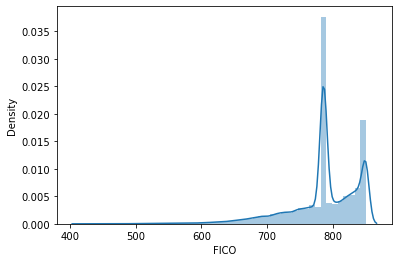

In [12]:
sns.distplot(df_fico['FICO'])      #to see the overall distribution

#### Before creating bins, we should have a basic idea about FICO scores.
   * A FICO Score is a three-digit number based on the information in your credit reports. 
######   It helps lenders determine how likely you are to repay a loan. 

   * This, in turn, affects how much you can borrow, how many months you have to repay, and how much it will cost (the interest rate).

* In general, many lenders find scores above 670 as indicating good creditworthiness. 
* Typically, the higher your score, the lower the risk and the more likely creditors are to lend to you.
* There are general score ranges recognized by creditors to help them make lending decisions. 
* These ranges can also serve as goals for you to achieve.
* The scores can be categorzied as below:

######   Poor      --> (300,580)
######   Fair      --> (580,670)
######   Good      --> (670,740)
######   Very Good --> (740,800)
######   Excellent --> (800,850)

In [13]:
## W'll create a range manually here

min_value=df_fico['FICO'].min()
max_value=df_fico['FICO'].max()
print(min_value)
print(max_value)

420.0
850.0


In [14]:
bin=[300,580,670,740,800,850]
bin

[300, 580, 670, 740, 800, 850]

In [15]:
label=['Poor','Fair','Good','Very Good','Excellent']

In [16]:
# Using the pd.cut command, we are creating 5 bins here with labels as mentioned. 
## 'Include lowest' is 'True' to get the idea of order of rating of the score.

df_fico['bins']=pd.cut(df_fico['FICO'],bins=bin,labels=label,include_lowest=True)
df_fico['bins']

C:\Users\PRABHA~1\AppData\Local\Temp/ipykernel_51036/2913253716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fico['bins']=pd.cut(df_fico['FICO'],bins=bin,labels=label,include_lowest=True)


0         Very Good
1         Excellent
2              Good
3         Excellent
4         Very Good
            ...    
100008    Very Good
100009    Very Good
100010    Very Good
100011    Very Good
100012    Very Good
Name: bins, Length: 100000, dtype: category
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very Good' < 'Excellent']

In [17]:
df_fico['bins'] =df_fico['bins'].fillna(method='ffill')    ## using ffill (forward fill) method to fill the null values 
                                                           ## in the bins columns.

C:\Users\PRABHA~1\AppData\Local\Temp/ipykernel_51036/3093526570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fico['bins'] =df_fico['bins'].fillna(method='ffill')    ## using ffill (forward fill) method to fill the null values


In [18]:
df_fico.sample(10)

,acct_id,FICO,bins
76781,76769,759.00000,Very Good
78189,78177,785.74892,Very Good
76214,76202,822.00000,Excellent
82413,82401,850.00000,Excellent
37562,37550,850.00000,Excellent
38377,38365,822.00000,Excellent
53623,53611,837.00000,Excellent
10528,10524,785.74892,Very Good
66925,66913,811.00000,Excellent
6460,6456,820.00000,Excellent


In [19]:
df_fico['bins'].isnull().sum()

0

In [20]:
df_fico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100012
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   acct_id  100000 non-null  int64   
 1   FICO     100000 non-null  float64 
 2   bins     100000 non-null  category
dtypes: category(1), float64(1), int64(1)
memory usage: 2.4 MB


##### No of Customers in each of the Groups.

In [21]:
df_fico['bins'].value_counts()

Very Good    48032
Excellent    36583
Good         11117
Fair          3505
Poor           763
Name: bins, dtype: int64

###### Percentage of Customers in each Segment

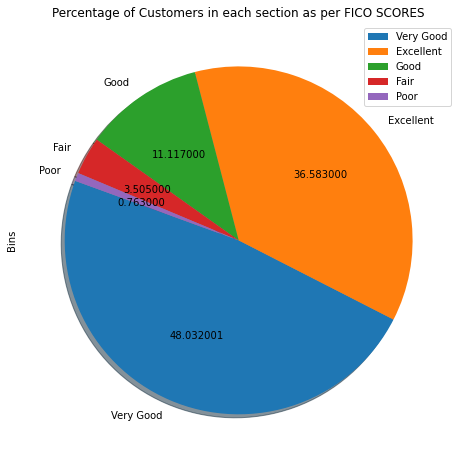

In [22]:
data={'Bins':[48032,36583,11117,3505,763]}
df=pd.DataFrame(data,columns=['Bins'],index=['Very Good','Excellent','Good','Fair','Poor'])

df.plot.pie(y='Bins',figsize=(12,8),autopct='%2f',startangle=160,shadow=True)
plt.title('Percentage of Customers in each section as per FICO SCORES')
plt.show()

##### Visulization of the same through a Histogram

(array([48032., 36583., 11117.,  3505.,   763.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

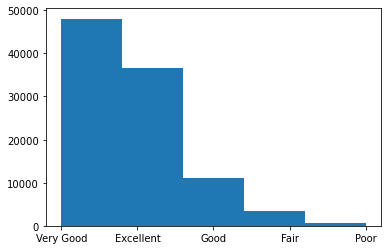

In [23]:
plt.hist(df_fico['bins'],bins=5)              ## histogram

<AxesSubplot:>

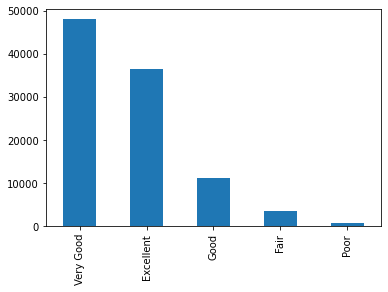

In [24]:
df_fico['bins'].value_counts().plot(kind='bar')    ##barplot

### 1.3

###  We can clearly see from the above analysis and visulization that:
#####  -The highest number customers are having a "Very Good" FICO Scores.
##### -There is also a good amount of Customers with "Excellent" FICO Scores.
##### -Only 15 % (nearly) have a fair or good or very poor FICO Scores.

### But this is slighly different from what happens in the real world. As:


##### -FICO scores take into account data in five areas to determine creditworthiness: 
* payment history, 
* current level of indebtedness, 
* types of credit used, 
* length of credit history, and 
* new credit accounts.

##### -Achieving a high FICO score requires having a mix of credit accounts and maintaining an excellent payment history. 
##### -Borrowers should also show restraint by keeping their credit card balances well below their limits.

##### -Most consumers have credit scores that fall between 600 and 750.  (Good to Very Good) Range.
##### -In 2020, the average FICO Score in the U.S. reached 710 (Very Good)—an increase of seven points from the previous year.

#####  67 % of Americans have a Good FICO Score or better.
##### Where as, in our dataset, 95 % have a Good FICO Score or better.

##### -There is a mismatch of around 30 % from the real world scenario. Thus, it surley doesn't reflects the real word in the true sense completely.

# Q. 2

##### We have a clean error free data now.

In [25]:
df_fico

,acct_id,FICO,bins
0,1,768.00000,Very Good
1,2,850.00000,Excellent
2,3,677.00000,Good
3,4,843.00000,Excellent
4,5,796.00000,Very Good
...,...,...,...
100008,99996,785.74892,Very Good
100009,99997,785.74892,Very Good
100010,99998,785.74892,Very Good
100011,99999,785.74892,Very Good


In [26]:
df_reg=pd.read_csv(r'E:\Downloads\region.csv')
df_reg

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia
...,...,...
100168,99996,Chicago
100169,99997,New York
100170,99998,San Diego
100171,99999,Chicago


In [27]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100173 entries, 0 to 100172
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100173 non-null  int64 
 1   region   100173 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [28]:
df_5=pd.concat([df_fico,df_reg],axis=1)

In [29]:
df_5 = df_5.loc[:,~df_5.columns.duplicated()]
df_5.head(10)

,acct_id,FICO,bins,region
0,1.0,768.0,Very Good,New York
1,2.0,850.0,Excellent,Dallas
2,3.0,677.0,Good,Los Angeles
3,4.0,843.0,Excellent,Chicago
4,5.0,796.0,Very Good,Philadelphia
5,6.0,669.0,Fair,New York
6,7.0,805.0,Excellent,San Antonio
7,8.0,850.0,Excellent,San Antonio
8,9.0,838.0,Excellent,Houston
9,10.0,850.0,Excellent,Philadelphia


In [30]:
df_6=pd.DataFrame(df_5,columns=['FICO','region'])
df_6.sample(10)

,FICO,region
74245,785.74892,San Diego
2090,850.00000,Phoenix
97797,850.00000,Los Angeles
95390,785.74892,Philadelphia
15810,785.74892,Houston
31416,699.00000,Charlotte
54769,838.00000,New York
19016,802.00000,Los Angeles
79253,785.74892,Los Angeles
20398,850.00000,San Antonio


In [31]:
pd.DataFrame(df_6.max())                                  #maximum FICO score in San Diego region

,0
FICO,850.0
region,San Diego


In [32]:
min_fico=df_6[df_6['FICO']==df_6['FICO'].min()]
min_fico                                                    ## minimum fico score in the New York region

,FICO,region
7606,420.0,New York


In [33]:
max_fico=df_6[df_6['FICO']==df_6['FICO'].max()]
max_fico.sample(5)

,FICO,region
11126,850.0,San Antonio
51025,850.0,Los Angeles
66703,850.0,Los Angeles
44392,850.0,Los Angeles
9511,850.0,Charlotte


In [34]:
len(max_fico)

12059

* There are 12 Thousand people with full fico scores.

# PART 3

## Fittlyf Website Data

In [35]:
f_df=pd.read_excel(r'E:\Downloads\Fyttlyf_Website_Data.xlsx')
f_df.head()

,evnt_dt,Event,geo_cntry,sessn_id,visitor_id,payload,page_name,devc_name,browser_type,traffic_source,Level 1,Level 2,Level 3,Level 4,Level 5
0,2021-02-02,Impression,France,zxio1f62e501790ad045c35zxioczxio4fcfd9e0c,gc1f62e501790gcd045c35gccgc4fcfd9e0d,isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...,Home Page,Generic Web Browser,Safari,cspreportnodeweb,1.0,0.0,0.0,0.0,0.0
1,2021-02-02,Impression,France,zxio5zxiod19131790a1d2d7azxio4582fczxio57a97,gc5gcd19131790gc1d2d7gcgc4582fcgc57gc98,isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...,Home Page,Generic Web Browser,Firefox,mppnodeweb,1.0,0.0,0.0,0.0,0.0
2,2021-02-02,Click,France,zxio42443001790ad0060551a73fcd9066e,3004cgc811770gcd0059ff44fcffdgc0gc27,isp_mozioxile_ckijrrier=PlusServer GmzioxH&ses...,Home Page,Motorola,Chrome Mobile,authchallengenodeweb,0.0,0.0,0.0,0.0,0.0
3,2021-02-02,Impression,France,zxio49fzxio3f31790ad04624f20adfcd025a0,gc463dcf41790gcd045gc51270efcd938d7,isp_mozioxile_ckijrrier=Vodkijfone Kkijzioxel ...,Home Page,Apple iPhone (iPhone 6 Plus),Safari,mppnodeweb,1.0,0.0,0.0,0.0,0.0
4,2021-02-02,Impression,France,zxio623401e1790a2758zxiodzxio164afczxio26736,gc623401e1790gc2758gcdgc164gcfcgc26737,isp_mozioxile_ckijrrier=kijmkijzon.com&session...,Home Page,Generic Web Browser,Chrome,mppnodeweb,1.0,0.0,0.0,0.0,0.0


In [36]:
f_df.shape

(101329, 15)

In [37]:
f_df.columns

Index(['evnt_dt', 'Event', 'geo_cntry', 'sessn_id', 'visitor_id', 'payload',
       'page_name', 'devc_name', 'browser_type', 'traffic_source', 'Level 1',
       'Level 2 ', 'Level 3', 'Level 4 ', 'Level 5 '],
      dtype='object')

In [38]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101329 entries, 0 to 101328
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   evnt_dt         101329 non-null  datetime64[ns]
 1   Event           101329 non-null  object        
 2   geo_cntry       101329 non-null  object        
 3   sessn_id        101329 non-null  object        
 4   visitor_id      101329 non-null  object        
 5   payload         101329 non-null  object        
 6   page_name       101314 non-null  object        
 7   devc_name       101314 non-null  object        
 8   browser_type    101314 non-null  object        
 9   traffic_source  101314 non-null  object        
 10  Level 1         101314 non-null  float64       
 11  Level 2         101314 non-null  float64       
 12  Level 3         101314 non-null  float64       
 13  Level 4         101314 non-null  float64       
 14  Level 5         101314 non-null  flo

# Q. 4

#### We can create a function which basically is a Dictionary type with Key and value. 
#### The function will take an argumenet Traffic Source and will maintain a value as Level2/Level 1 and so on.

# Q. 5

In [39]:
f_df['payload']

0         isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...
1         isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...
2         isp_mozioxile_ckijrrier=PlusServer GmzioxH&ses...
3         isp_mozioxile_ckijrrier=Vodkijfone Kkijzioxel ...
4         isp_mozioxile_ckijrrier=kijmkijzon.com&session...
                                ...                        
101324    isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...
101325    isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...
101326    isp_mozioxile_ckijrrier=EWE-Tel GmzioxH&sessio...
101327    isp_mozioxile_ckijrrier=Unitymedikij&session_i...
101328    isp_mozioxile_ckijrrier=Telmex&session_id_cook...
Name: payload, Length: 101329, dtype: object

### Here we can split the row enteries as per our convenience.
### This is also a dictionart type and can be separated well at the & cut.


# Q. 6

In [41]:
f_df['Event'].value_counts()

Impression    67557
Click         33772
Name: Event, dtype: int64

<AxesSubplot:>

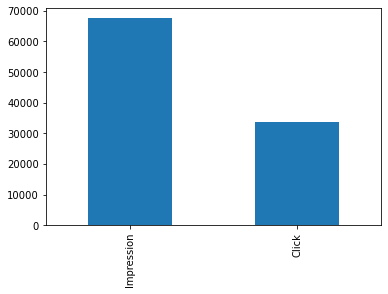

In [42]:
f_df['Event'].value_counts().plot(kind='bar')

##### - We can clearly state that Out of around 1 lakh visitors,
##### - Around 68 % users are just seeing the advertisment (Impressions) . He/She are not engaging.
##### - Around 35 % users are actually clicking on the link and engaging.

In [43]:
f_df['geo_cntry'].value_counts()

France           69728
United States    31601
Name: geo_cntry, dtype: int64

<AxesSubplot:>

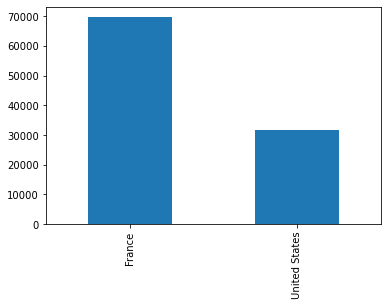

In [44]:
f_df['geo_cntry'].value_counts().plot(kind='bar')

##### - Majority of the Audience is Coming from France (70 %)
##### - 30 % audience is coming from United States. 

<AxesSubplot:xlabel='geo_cntry', ylabel='count'>

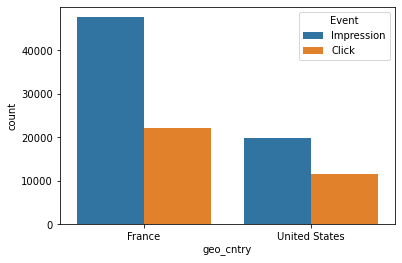

In [45]:
sns.countplot(x='geo_cntry',hue='Event',data=f_df)

##### - Out of around 35 thousand clicks,
##### - Maximum amount of clicks are coming from France. Around (23 thousand)
##### - And around (12 thousand clicks) are coming from United States.

### CTR(Click-through rate)

### The basic and the General Formula of CTR= Clicks/Impressions

###### France
##### CTR for FRANCE = 23 K clicks/ 70 K Impressions

In [46]:
CTR_france=23000/70000*100
CTR_france

32.857142857142854

In [47]:
CTR_US=12000/30000*100
CTR_US

40.0

### Therefore,
### The CTR OF France is 32 %.
### The CTR OF United States is 40 %

###### On event basis

In [48]:
f_df['evnt_dt'].value_counts()

2021-02-02    101329
Name: evnt_dt, dtype: int64

##### - Since it is a Single day count of Visitors on the Website.

<AxesSubplot:xlabel='evnt_dt', ylabel='count'>

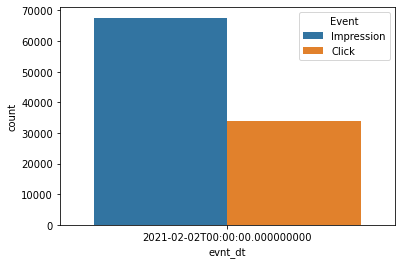

In [49]:
sns.countplot(x='evnt_dt',hue='Event',data=f_df)

###### Highest click in terms of browser_type 

In [50]:
f_df['browser_type'].value_counts()

Chrome Mobile               29580
Chrome                      27226
Safari                      20821
Firefox                     11357
Edge                         5749
Samsung Browser              3663
Android Browser               984
#                             823
Internet Explorer             432
Opera Mobile                  267
MIUI Browser                  181
Opera                          67
Amazon Silk                    57
Opera Touch                    30
UC Browser                     20
Puffin                          8
HeyTap Browser                  8
Iron                            6
Yandex.Browser                  6
Maxthon                         5
BlackBerry Browser              4
Opera Mini                      4
Pale Moon                       4
Internet Explorer Mobile        3
Vivaldi                         2
Nokia S60 Browser               2
Firefox Focus                   2
Chromium                        1
UP.Browser                      1
MQQ Browser   

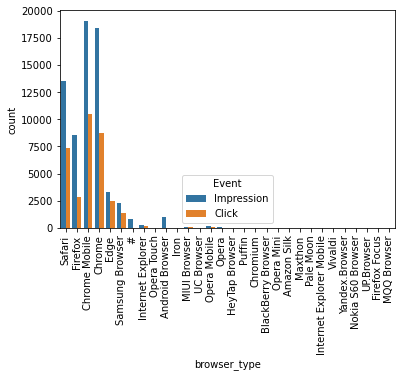

In [51]:
sns.countplot(x='browser_type',hue='Event',data=f_df)
plt.xticks(rotation='vertical')
plt.show()
sns.set(rc={'figure.figsize':(15,10)})

#### We can state:
##### - Chrome mobile got the Highest click sessions followed by Chrome desktop and Safari on a Single day.

In [56]:
## -------------------------------------------------------------------------------------------